# Quantum key distribution
In this notebook, we will be discussing the quantum key distribution. We will first discuss the importance of sharing key in communication and the problems related to it. In addition, we will discuss the RSA encryption, which is an asymmetric encryption that does not require shared key for communication.

## Communication and shared key
When we communicate, it is essential to encrypt the messages. One of the classical way to do this is to use a key to encrypt the message by converting each character to numbers (for example, ASCII number) and add the number representation of each character in the key to generate encrypted character. For example, given the following ASCII table
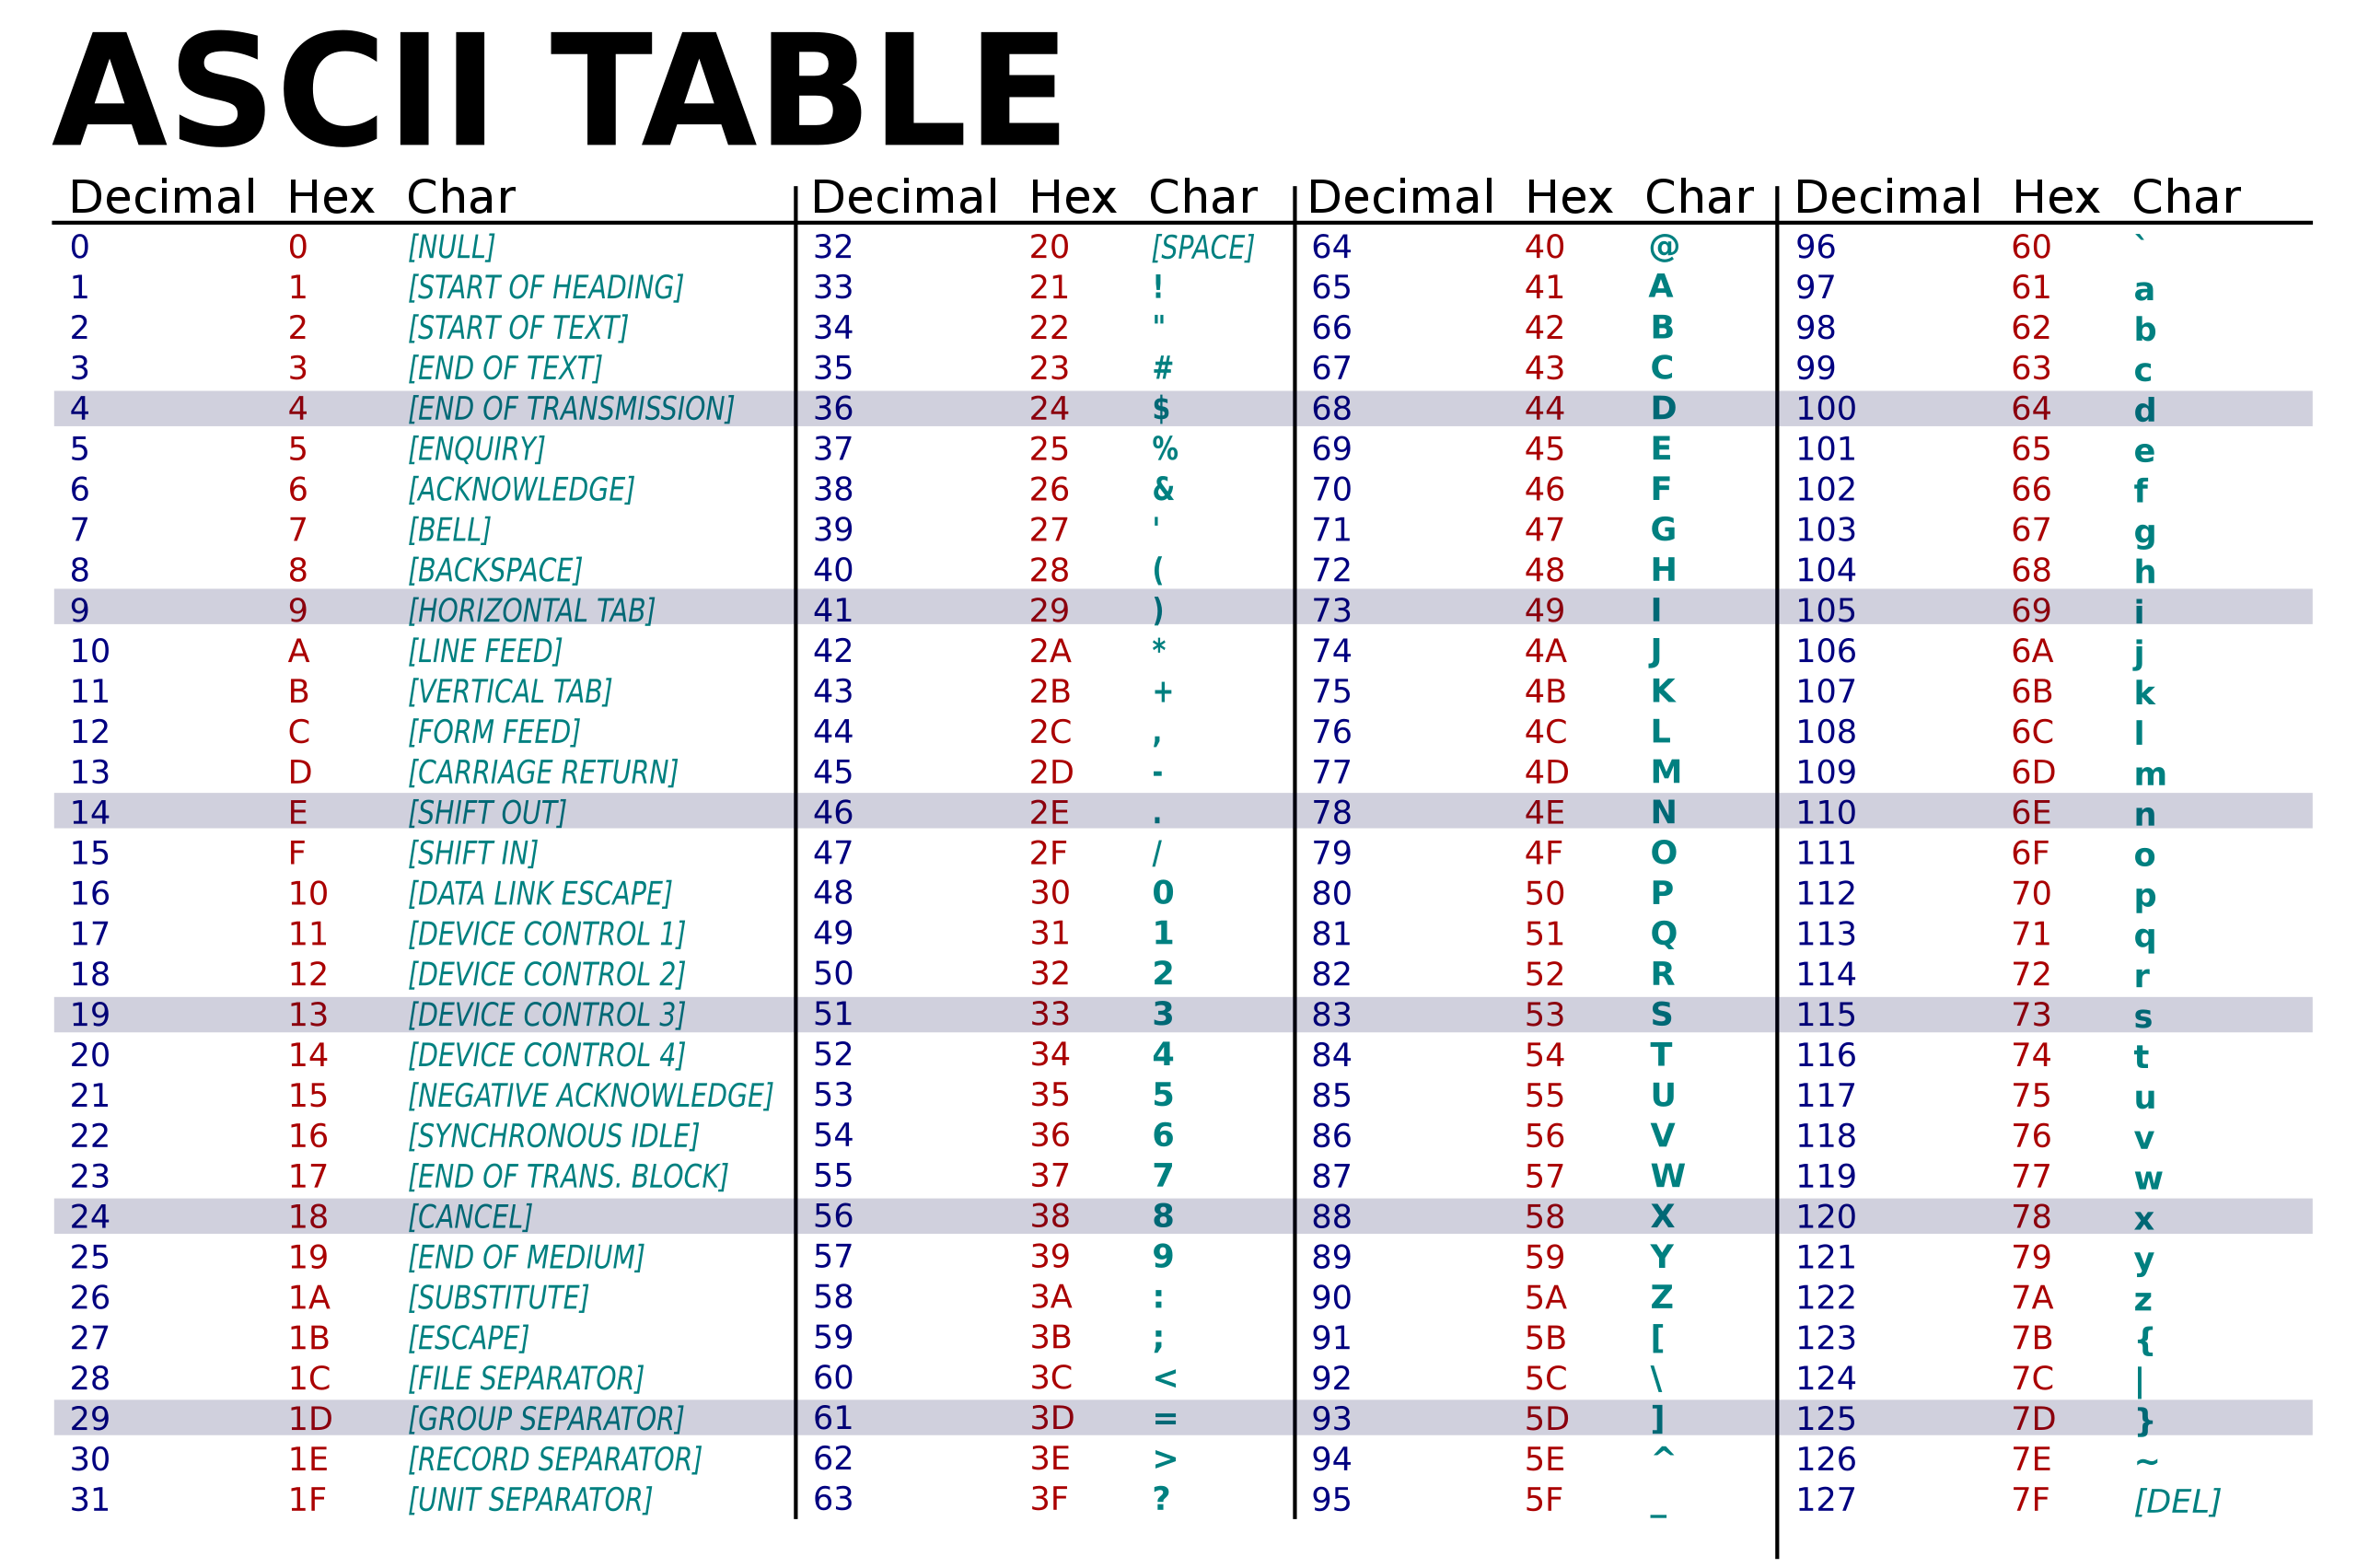
The message "Hello" can be converted to "48 65 6C 6C 6F" in hexadecimal.
For simplicity, assuming the out message only contains lowercase characters and characters a, b, ..., z corresponds to number 0, 1, ..., 25. In our case, "hello" will be encrypted into "7 4 11 11 14". Let's say that the shared key is "t", which is "19" in our representation. Then, for each character representation c in the message with a key representation k, the encrypted representation c' can be calculated by performing the following calculation $c' = (c + k) \text{ mod } 26$ and then, c' can be converted back to a real character given the representation. In our previous example, the encryped message is:
|  |  |  |  |  |  |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| Message | h | e | l | l | o |
| Key | t | t | t | t | t |
| Message representation | 7 | 4 | 11 | 11 | 14 |
| Key representation | 19 | 19 | 19 | 19 | 19 |
| Encrypted representation | 0 | 23 | 4 | 4 | 7 |
| Encrypted message | a | x | e | e | h |

Thus, the encrypted message is "axeeh". Notice that the key does not need to have a specific length. We can choose the key to be "take". Applying the key to the message "hello", the key would be "taket" as we can repeat the key until it fill the length of the message.

This is just a simple version of message encryption, but it illustrates the idea of using a shared key to encrypt a message. The reason the key is called "shared" is the as the sender encrypt a message, the receiver must also have the key to decrypt the message to get the original message. The decrypting process is simply to reverse the modulo calculation did in the ecryption.

One major problem here is that how can the key be shared? Let the name of the two communicators be Alice and Bob. Alice or Bob will somehow have to transfer to the other the key. Let's say that Eve has a secured channel for Alice and Bob to communicate the shared key. A problem now arises as Alice and Bob do not know whether Eve is doing anything to the encrypted message or the key. Thus, they have no control over the safety of the channel as well as the integrity of the messages and keys that got transferred. 

Such encryption that requires one key to encrypt and decrypt is called **symmetric encryption**.

## RSA encryption
As mentioned, symmetric encryption can be dangerous as if the shared key is leaked, the whole message can be exposed. One solution to this is to eliminate the usage of shared key, i.e. using **Asymmetric encryption**. The reason it is called "asymmetric" is that there are two keys, namely public and private key. Both of the key can be used to encrypt a message, and as one is used to encrypt the message, the other one can be used to decrypt it.

A very famous example of asymmetric encryption is the RSA encryption, which is heavily based on modular arithmetic and number theory, especially in factorization and prime number. 

To illustrate the idea of RSA encryption, we will choose the private message to be $m = 4$. Then, we will be picking two prime number and let them be $p = 907$ and $q = 773$. Then, a number $n = p \cdot q = 701111$.

Then we will use the Carmicheal's totient function $\lambda(n) = lcm(p-1, q-1) = 349716$.
Given this, the public key $e$ will be chosen as a prime number between $2$ and $349716$, while the private key $d$ is the modular inverse of $e \text{ mod } \lambda(n)$. For example, if we pick $e = 11$, then $d = 254339$. Given the two key, the private message can be encrypted as $c = m^e \text{ mod } n = 688749$, and the decrypted message is $m = c^d \text{ mod } n = 4$.

The above example is just a simple illustration of RSA. In reality, two people have to share their public key and keep their private key in secret to remain secured connection. One property of RSA encryption is that even if we know the public key, it is still cannot be decrypted. 

Cracking RSA is possible, but it would take a very long time to do it. However, with the existence of quantum computing and Shor's algorithm, cracking RSA is completely possible in a much shorter time. Thus, in the near future, RSA might not be safe anymore.

## Quantum key distribution
The main idea of this method is that measuring a qubit can change its state. Thus, if Alice send Bob a qubit, and Eve tries to measure it before Bob does, there is a chance that Eve will change the state of the qubit and Bob will not receive the correct qubit that Alice send.

In our next illustration of the quantum key distribution, we use the Z-basis as a basis for $\lvert 0 \rangle$ and $\lvert 1 \rangle$ while the X-basis as a basis for $\lvert + \rangle$ and $\lvert - \rangle$. When a bit $\lvert + \rangle$ is measured in the X-basis, we will get 0, while a bit $\lvert - \rangle$ will be measured to 1.

If Alice send Bob a qubit in state $\lvert + \rangle$ in the X-basis and Bob measure it in X-basis, we is guaranteed to measure to $0$. We can illustrate it using the following example:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random, cmath, math
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, state_visualization
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city 
import qis401

In [6]:
def alice_bob_no_inteference():
    channel = QuantumRegister(1, "channel")
    measure_channel = ClassicalRegister(1, "measure")

    circ = QuantumCircuit(channel, measure_channel)

    circ.h(channel)
    circ.barrier()
    circ.h(channel)

    circ.measure(channel, measure_channel)

    result = qis401.simulate_circuit(circ, shots=100)
    counts = result.get_counts(circ)

    return circ, counts

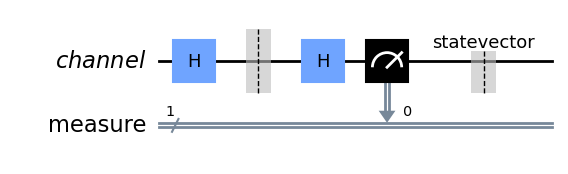

In [7]:
circ, counts = alice_bob_no_inteference()
circ.draw("mpl")

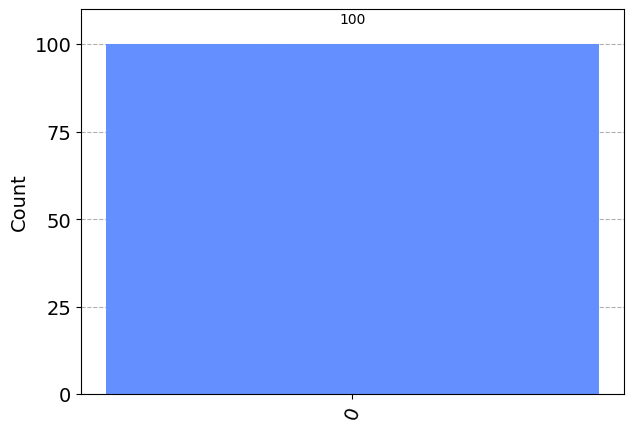

In [8]:
plot_histogram(counts)

However, if Eve is trying to measure the qubit in Z-basis before it reaches Bob, she will change the qubit state from $\lvert + \rangle$ to either $\lvert 0 \rangle$ or $\lvert 1 \rangle$. Thus, Bob no longer measures to 0:

In [9]:
def alice_bob_inteference():
    channel = QuantumRegister(1, "channel")
    measure_channel = ClassicalRegister(1, "measure")

    circ = QuantumCircuit(channel, measure_channel)

    circ.h(channel)
    circ.measure(channel, measure_channel)
    circ.barrier()
    circ.h(channel)

    circ.measure(channel, measure_channel)

    result = qis401.simulate_circuit(circ, shots=100)
    counts = result.get_counts(circ)

    return circ, counts

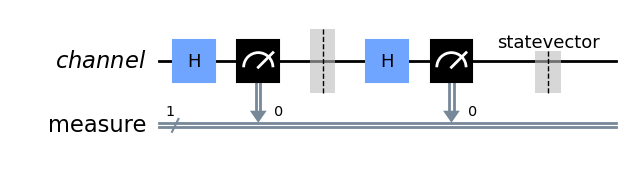

In [10]:
circ, counts = alice_bob_inteference()
circ.draw("mpl")

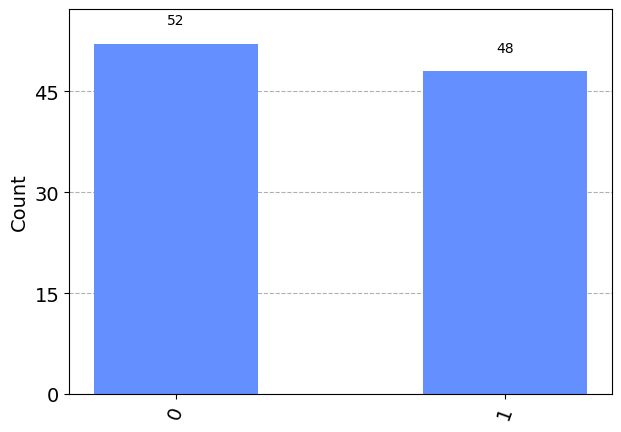

In [11]:
plot_histogram(counts)

Thus, Bob now have a $50\%$ chance of measuring 1, and if he does, Alice will know there is something wrong with their channel.

Therefore, the quantum key distribution protocol is invented to repeat this process a number of times so that an eavesdropper has a negligible chance of getting away with this inception. The steps are defined as follows:

### Step 1:
Alice chooses a string of random bits. For example:</br>
1000101011010100</br>
And a random choice of basis for each bit. For example:</br>
ZZXZXXXZXZXXXXXX</br>
And then she keeps these two pieces of information private to herself.

### Step 2:
Alice then encodes each bit onto a string of qubits with respect to the basis she chose. Using the examples we used, the string of qubit will be:
|  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |
|  ----------- |  ----------- |  ----------- |  ----------- |  ----------- |  ----------- |  ----------- |  ----------- |  ----------- |  ----------- |  ----------- |  ----------- |  ----------- |  ----------- |  ----------- |  ----------- | ----------- | 
| Bits | 1 | 0 | 0 | 0 | 1 | 0 | 1 | 0 | 1 | 1 | 0 | 1 | 0 | 1 | 0 | 0 |
| Basis | Z | Z | X | Z | X | X | X | Z | X | Z | X | X | X | X | X | X |
| Qubits | $\lvert 1 \rangle$ | $\lvert0\rangle$ | $\lvert+\rangle$ | $\lvert0\rangle$ | $\lvert-\rangle$ | $\lvert+\rangle$ | $\lvert-\rangle$ | $\lvert0\rangle$ | $\lvert-\rangle$ | $\lvert1\rangle$ | $\lvert+\rangle$ | $\lvert-\rangle$ | $\lvert+\rangle$ | $\lvert-\rangle$ | $\lvert+\rangle$ | $\lvert+ \rangle$

### Step 3:
Bob then measures each qubit with random basis. For example: </br>
XZZZXZXZXZXZZZXZ </br>
And he keeps the measurement results private.

### Step 4:
Bob and Alice then publicly share which basis they used for each qubit. If Bob measured a qubit in the same basis Alice prepared it in, they use this to form part of their shared secret key, otherwise they discard the information.

### Step 5:
Finally, Bob and Alice share a random sample of their keys, and if the samples match (with small error), they can be sure that their transmission is successful.

## Illustration without Interception from Eve
First, lets demonstrate this protocol when there is no eavesdropper. First, we randomly generate a set of bits from Alice:

In [20]:
np.random.seed(seed=0)
n = 100
alice_bits = np.random.randint(2, size=n)
print(alice_bits)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]


Then, we also generate the random basis for Alice, with 0 means the Z-basis, X-basis otherwise.

In [21]:
alice_bases = np.random.randint(2, size=n)
print(alice_bases)

[1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]
